In [23]:
import MySQLdb as mdb
import numpy as np
import csv
import sys
import re
sys.path.append("../src/")
from src.fingerprint import Fingerprint
from src import CSV_DELIMITER

import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH_REL = "../../data/"

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
# Exclusion of some attributes
ATTRIBUTES_TO_EXCLUDE = [Fingerprint.COUNTER, Fingerprint.CREATION_TIME, Fingerprint.END_TIME, Fingerprint.CONSISTENT]

In [25]:
# read the file
df = pd.read_csv(DATA_PATH_REL + "processed/fingerprint_dataset.csv", delimiter=CSV_DELIMITER, engine="python")

In [26]:
# Analysis of consistent fingerprints
attributes_to_analyze = [attribute for attribute in df.columns.tolist() if attribute not in ATTRIBUTES_TO_EXCLUDE]
df_consistent = df[df[Fingerprint.CONSISTENT] == True ]
print("There are {:d} elements in df_consistent".format(len(df_consistent)))

There are 49271 elements in df_consistent


In [27]:
# Name of attributes
print(df_consistent.columns, "There are {:d} columns in df_consistent".format(len(df_consistent.columns)))

Index(['counter', 'id', 'creationDate', 'endDate', 'addressHttp',
       'userAgentHttp', 'acceptHttp', 'connectionHttp', 'encodingHttp',
       'languageHttp', 'orderHttp', 'pluginsJSHashed', 'platformJS',
       'cookiesJS', 'dntJS', 'timezoneJS', 'resolutionJS', 'localJS',
       'sessionJS', 'canvasJSHashed', 'fontsFlashHashed', 'resolutionFlash',
       'languageFlash', 'platformFlash', 'browserFamily',
       'globalBrowserVersion', 'minorBrowserVersion', 'majorBrowserVersion',
       'os', 'rendererWebGLJS', 'vendorWebGLJS', 'pluginsJS', 'consistent'],
      dtype='object') There are 33 columns in df_consistent


In [8]:
# Visualization of the first 5 lines
df_consistent.head(5)

,counter,id,creationDate,endDate,addressHttp,userAgentHttp,acceptHttp,connectionHttp,encodingHttp,languageHttp,...,platformFlash,browserFamily,globalBrowserVersion,minorBrowserVersion,majorBrowserVersion,os,rendererWebGLJS,vendorWebGLJS,pluginsJS,consistent
15,17,0f4f77e3-80da-4b4a-b9c0-f5e8c4239380,2015-07-27 11:00:00,None,24f5398bba446ce8dadfd3d23ca2f4e58895e76e,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"text/html,application/xhtml+xml,application/xm...",close,"gzip, deflate, sdch","en-US,en;q=0.8,fr;q=0.6",...,Linux,Chrome,440,0,44,Linux,Mesa DRI Intel(R) Haswell Mobile,Intel Open Source Technology Center,Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...,True
17,19,74bf8f6f-0114-44b4-9bca-1cfc52ffc2d3,2015-07-27 12:00:00,None,24f5398bba446ce8dadfd3d23ca2f4e58895e76e,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"text/html,application/xhtml+xml,application/xm...",close,"gzip, deflate, sdch","en-US,en;q=0.8,fr;q=0.6",...,Linux,Chrome,440,0,44,Linux,Mesa DRI Intel(R) Haswell Mobile,Intel Open Source Technology Center,Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...,True
18,20,df46c5fb-9889-4ff4-9f51-e5af591f3460,2015-07-27 12:00:00,None,24f5398bba446ce8dadfd3d23ca2f4e58895e76e,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"text/html,application/xhtml+xml,application/xm...",close,"gzip, deflate, sdch","en-US,en;q=0.8,fr;q=0.6",...,Linux,Chrome,440,0,44,Linux,Mesa DRI Intel(R) Haswell Mobile,Intel Open Source Technology Center,Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...,True
19,21,dc031028-a4ea-4ce8-a362-17b07a4f4d65,2015-07-27 12:00:00,2015-07-28 11:00:00,90f2974eff1d1b3f05d01f413cf0241fae23352e,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,"text/html,application/xhtml+xml,application/xm...",close,"gzip, deflate, sdch","fr-FR,fr;q=0.8,en-US;q=0.6,en;q=0.4",...,Mac OS 10.10.4,Chrome,440,0,44,Mac OS X,Intel HD Graphics 5000 OpenGL Engine,Intel Inc.,Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...,True
20,22,d51d09c6-2596-4958-bfe7-0352af2aaccf,2015-07-27 12:00:00,2015-07-29 06:00:00,2515ee56512877237d467911f5c55be53eea3550,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"text/html,application/xhtml+xml,application/xm...",close,"gzip, deflate, sdch","fr-FR,fr;q=0.8,en-US;q=0.6,en;q=0.4",...,Linux,Chrome,430,0,43,Linux,Not supported,Not supported,Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...,True


In [117]:
print("Statistics on dataset filtered: only consistent browsers")
for attribute in attributes_to_analyze:
    nb_distinct_values = df_consistent[attribute].value_counts().count()
    print("{} : {:d} distinct values".format(attribute, nb_distinct_values))

Statistics on dataset filtered: only consistent browsers
id : 4651 distinct values
addressHttp : 15781 distinct values
userAgentHttp : 2289 distinct values
acceptHttp : 7 distinct values
connectionHttp : 1 distinct values
encodingHttp : 12 distinct values
languageHttp : 424 distinct values
orderHttp : 114 distinct values
pluginsJSHashed : 4247 distinct values
platformJS : 17 distinct values
cookiesJS : 2 distinct values
dntJS : 2 distinct values
timezoneJS : 33 distinct values
resolutionJS : 446 distinct values
localJS : 2 distinct values
sessionJS : 2 distinct values
canvasJSHashed : 938 distinct values
fontsFlashHashed : 4684 distinct values
resolutionFlash : 257 distinct values
languageFlash : 27 distinct values
platformFlash : 222 distinct values
browserFamily : 18 distinct values
globalBrowserVersion : 78 distinct values
minorBrowserVersion : 21 distinct values
majorBrowserVersion : 43 distinct values
os : 14 distinct values
rendererWebGLJS : 489 distinct values
vendorWebGLJS : 13

In [48]:
# Détection of inconsistent values
df_consistent[df_consistent['browserFamily']== "IE Mobile"]["os"]

87094    Other
87096    Other
87097    Other
Name: os, dtype: object

In [49]:
# N° of the fingerprint to take off it from consistent fingerprints
df_consistent[df_consistent['browserFamily'] == "IE Mobile"]["id"]

87094    d2869d31-770a-4e4a-b91a-331c47e1e144
87096    d2869d31-770a-4e4a-b91a-331c47e1e144
87097    d2869d31-770a-4e4a-b91a-331c47e1e144
Name: id, dtype: object

In [52]:
df_consistent[df_consistent['id']== "d2869d31-770a-4e4a-b91a-331c47e1e144"]

,counter,id,creationDate,endDate,addressHttp,userAgentHttp,acceptHttp,connectionHttp,encodingHttp,languageHttp,...,platformFlash,browserFamily,globalBrowserVersion,minorBrowserVersion,majorBrowserVersion,os,rendererWebGLJS,vendorWebGLJS,pluginsJS,consistent
87094,117423,d2869d31-770a-4e4a-b91a-331c47e1e144,2017-02-10 09:00:00,2017-02-10 09:00:00,2f998c35b04d46117baa579021107c4911fd8387,safari (compatible; MSIE 9.0; samsung Phone OS...,"text/html,application/xhtml+xml,application/xm...",close,"gzip, deflate, br","en-US,en;q=0.5",...,Flash not detected,IE Mobile,90,0,9,Other,Not supported,Not supported,NaN,True
87096,117425,d2869d31-770a-4e4a-b91a-331c47e1e144,2017-02-10 09:00:00,2017-02-10 09:00:00,2f998c35b04d46117baa579021107c4911fd8387,safari (compatible; MSIE 9.0; samsung Phone OS...,"text/html,application/xhtml+xml,application/xm...",close,"gzip, deflate, br","en-US,en;q=0.8",...,Flash not detected,IE Mobile,90,0,9,Other,Not supported,Not supported,NaN,True
87097,117427,d2869d31-770a-4e4a-b91a-331c47e1e144,2017-02-10 09:00:00,None,2f998c35b04d46117baa579021107c4911fd8387,safari (compatible; MSIE 9.0; samsung Phone OS...,"text/html,application/xhtml+xml,application/xm...",close,"gzip, deflate, br",en-us,...,Flash not detected,IE Mobile,90,0,9,Other,Not supported,Not supported,NaN,True


In [61]:
# entropy
def compute_entropy(df, attribute):
    entropy = 0
    serie = df[attribute].value_counts()
    
    if len(serie) == 1:
        return 0
    
    total_values = serie.sum()
    for index, value in serie.iteritems():
        pi = float(value)/float(total_values)
        entropy += pi * np.log2(pi)
    
    return -entropy

def compute_normalized_entropy(df, attribute):
    number_distinct = df[attribute].value_counts().sum()
    
    if number_distinct == 1:
        return 0
    
    pi_worst = 1.0 / float(number_distinct)
    worst_case = -number_distinct * pi_worst * np.log2(pi_worst)
    
    df[attribute].value_counts().count()
    entropy = compute_entropy(df, attribute)
    return entropy / worst_case


print("Entropy on dataset filtered: only consistent browsers")
for attribute in attributes_to_analyze:
    entropy = compute_normalized_entropy(df_consistent, attribute)
    print("{} : {:f} bits".format(attribute, entropy))

Entropy on dataset filtered: only consistent browsers
id : 0.655848 bits
addressHttp : 0.785361 bits
userAgentHttp : 0.567186 bits
acceptHttp : 0.062577 bits
connectionHttp : 0.000000 bits
encodingHttp : 0.116758 bits
languageHttp : 0.326656 bits
orderHttp : 0.185542 bits
pluginsJSHashed : 0.530793 bits
platformJS : 0.099387 bits
cookiesJS : 0.004120 bits
dntJS : 0.063202 bits
timezoneJS : 0.208508 bits
resolutionJS : 0.248285 bits
localJS : 0.022550 bits
sessionJS : 0.022331 bits
canvasJSHashed : 0.427145 bits
fontsFlashHashed : 0.492978 bits
resolutionFlash : 0.232937 bits
languageFlash : 0.163492 bits
platformFlash : 0.230398 bits
browserFamily : 0.076352 bits
globalBrowserVersion : 0.258192 bits
minorBrowserVersion : 0.005404 bits
majorBrowserVersion : 0.256442 bits
os : 0.160001 bits
rendererWebGLJS : 0.297902 bits
vendorWebGLJS : 0.133481 bits


In [25]:
# entropy
def compute_entropy(df, attribute):
    entropy = 0
    tmp_stats = []
    ids = set(df_consistent['id'].unique())
    for user_id in ids:
        df_user_id = df_consistent[df_consistent['id'] == user_id]
        different_values = df_user_id[attribute].unique()
        for value in different_values:
            tmp_stats.append({
                "id": user_id,
                attribute : value
            })
    df_stats = pd.DataFrame(tmp_stats)
    
    serie = df_stats[attribute].value_counts()
    
    if len(serie) == 1:
        return 0
    
    total_values = serie.sum()
    for index, value in serie.iteritems():
        pi = float(value)/float(total_values)
        entropy += pi * np.log2(pi)
    
    return -entropy

def compute_normalized_entropy(df, attribute):
    number_distinct = df[attribute].value_counts().sum()
    
    if number_distinct == 1:
        return 0
    
    pi_worst = 1.0 / float(number_distinct)
    worst_case = -number_distinct * pi_worst * np.log2(pi_worst)
    
    df[attribute].value_counts().count()
    entropy = compute_entropy(df, attribute)
    return entropy / worst_case


print("Entropy on dataset filtered: only consistent browsers")
for attribute in attributes_to_analyze:
    entropy = compute_normalized_entropy(df_consistent, attribute)
    print("{} : {:f} bits".format(attribute, entropy))

Entropy on dataset filtered: only consistent browsers
id : 0.781561 bits
addressHttp : 0.888301 bits
userAgentHttp : 0.613847 bits
acceptHttp : 0.064851 bits
connectionHttp : 0.000000 bits
encodingHttp : 0.122460 bits
languageHttp : 0.320505 bits
orderHttp : 0.193803 bits
pluginsJSHashed : 0.610079 bits
platformJS : 0.108445 bits
cookiesJS : 0.008708 bits
dntJS : 0.063739 bits
timezoneJS : 0.227500 bits
resolutionJS : 0.289189 bits
localJS : 0.031249 bits
sessionJS : 0.031101 bits
canvasJSHashed : 0.487428 bits
fontsFlashHashed : 0.542996 bits
resolutionFlash : 0.232677 bits
languageFlash : 0.164726 bits
platformFlash : 0.222875 bits
browserFamily : 0.087173 bits
globalBrowserVersion : 0.269478 bits
minorBrowserVersion : 0.019851 bits
majorBrowserVersion : 0.264609 bits
os : 0.171668 bits
rendererWebGLJS : 0.266548 bits
vendorWebGLJS : 0.116709 bits
pluginsJS : 0.630395 bits


In [123]:
# terms : effective, %
# number of unique terms
# most common terms
def analyse_terms(df, attribute):
    tmp_stats = []
    ids = set(df['id'].unique())
    for user_id in ids:
        df_user_id = df[df_consistent['id'] == user_id]
        different_values = df_user_id[attribute].unique()
        for value in different_values:
            tmp_stats.append({
                "id": user_id,
                attribute : value
            })
    df_stats = pd.DataFrame(tmp_stats)
    
    nb = df_stats[attribute].value_counts()
    df_nb = pd.DataFrame(nb)
    
    nb_percent = nb/nb.sum()*100
    df_nb_percent = pd.DataFrame(nb_percent)
    
    tab = df_nb.join(df_nb_percent, lsuffix='_left', rsuffix='_right')
    tab.columns = ['effective', '%']
    
    
    print(tab)
    print()
    
    df_nb[:20].plot(kind='barh', stacked=False, width=0.9)
    plt.gca().invert_yaxis() 
    plt.grid(axis='x', linestyle = 'dashed')
    plt.show()
    
    print("There are {:d} unique terms for the attribute '{}'".format(len(nb[nb.values == 1]), attribute))
    print()
    print("The most used terms are: \n{}".format(nb[:5]))

              effective          %
1920x1080x24       1639  26.358958
768x1366x24        1069  17.192023
900x1440x24         331   5.323255
900x1600x24         308   4.953361
800x1280x24         288   4.631714
1680x1050x24        283   4.551303
768x1024x24         271   4.358315
1920x1200x24        255   4.100997
1280x1024x24        238   3.827597
2560x1440x24        167   2.685751
864x1536x24         123   1.978128
720x1280x24         121   1.945963
768x1360x24          75   1.206176
800x600x24           57   0.916693
768x1364x24          49   0.788035
2880x1800x24         37   0.595047
2560x1600x24         29   0.466388
1600x1200x24         28   0.450306
2560x1080x24         27   0.434223
640x480x24           25   0.402059
864x1152x24          23   0.369894
768x1280x24          21   0.337729
3440x1440x24         17   0.273400
600x1024x24          16   0.257317
2048x1152x24         16   0.257317
960x1280x24          15   0.241235
0x0x24               14   0.225153
1920x1080x16        

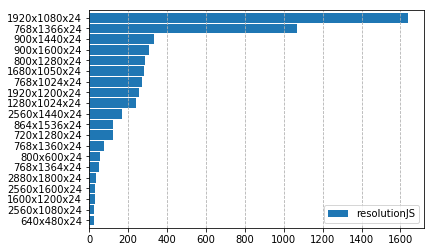

There are 327 unique terms for the attribute 'resolutionJS'

The most used terms are: 
1920x1080x24    1639
768x1366x24     1069
900x1440x24      331
900x1600x24      308
800x1280x24      288
Name: resolutionJS, dtype: int64


In [138]:
analyse_terms(df_consistent, 'resolutionJS')

The distinct values for the attribute 'languageHttp' are : 
 ['de' 'pt' 'ru' 'en' 'fr' 'cs' 'da' 'it' 'nl' 'sv' 'sl' 'es' 'nb' 'hu'
 'pl' 'sh' 'ja' 'ac' 'uk' 'zh' 'tr' 'az' 'sk' 'fi' 'ko' 'th' 'vi' 'hr'
 'ro' 'an' 'ch' 'ca' 'ar' 'lt' 'el' 'af' 'bg' 'et']

    effective          %
en       2672  53.968895
ru        850  17.168249
fr        583  11.775399
de        320   6.463341
es         79   1.595637
it         61   1.232074
pl         59   1.191678
zh         57   1.151283
nl         52   1.050293
pt         42   0.848313
hu         35   0.706928
cs         21   0.424157
ja         18   0.363563
uk         13   0.262573
da         12   0.242375
tr          8   0.161584
ac          8   0.161584
sv          8   0.161584
fi          6   0.121188
vi          6   0.121188
ko          5   0.100990
sk          5   0.100990
af          4   0.080792
hr          4   0.080792
lt          3   0.060594
sl          3   0.060594
el          2   0.040396
nb          2   0.040396
sh          2   0.0

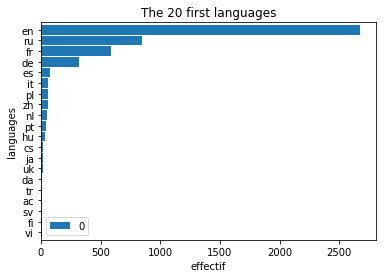

There are 7 unique terms for the attribute 'languageHttp'

The most used terms are: 
en    2672
ru     850
fr     583
de     320
es      79
Name: 0, dtype: int64


In [10]:
# analyze terms for the attribute 'languageHttp'
tmp_stats = []
ids = set(df_consistent['id'].unique())
for user_id in ids:
    df_user_id = df_consistent[df_consistent['id'] == user_id]
    different_values = df_user_id['languageHttp'].unique()
    for value in different_values:
        tmp_stats.append({
            "id": user_id,
            'languageHttp' : value
        })
df_stats = pd.DataFrame(tmp_stats)

language_http=df_stats['languageHttp']
language_http_less_nan=language_http.dropna()
language_http_less_nan_list= language_http_less_nan.values.tolist()

languages = []
for i in range(0,len(language_http_less_nan_list)):    
    languages.append(language_http_less_nan_list[i][:2])

langues_df = pd.DataFrame(languages)

print("The distinct values for the attribute 'languageHttp' are : \n {}".format(langues_df[0].unique()))

    
nb = langues_df[0].value_counts()
df_nb = pd.DataFrame(nb)
    
nb_percent = nb/nb.sum()*100
df_nb_percent = pd.DataFrame(nb_percent)
    
tab = df_nb.join(df_nb_percent, lsuffix='_left', rsuffix='_right')
tab.columns = ['effective', '%']

print()
print(tab)
print()

df_nb[:20].plot(kind='barh', stacked=False, width=0.9)
plt.gca().invert_yaxis()
plt.title('The 20 first languages')
plt.xlabel('effectif')
plt.ylabel('languages')
plt.show()

print("There are {:d} unique terms for the attribute 'languageHttp'".format(len(nb[nb.values == 1])))
print()
print("The most used terms are: \n{}".format(nb[:5]))


In [102]:
#modality of plugins
tmp_stats = []
plugins=re.findall("Plugin [0-9]+: ([a-zA-Z -.]+)", str(df_consistent['pluginsJS']))
plugins_df=pd.DataFrame(plugins)
plugins_df[0].unique()

array(['Chrome PDF Viewer', 'Chromium PDF Viewer',
       'Default Browser Helper', 'Shockwave Flash', 'DivX',
       'Gnome Shell Integration', 'Google Update', 'Native Client',
       'Adobe Acrobat'], dtype=object)

In [127]:
def analyse_terms_splited(df, attribute, split_function):
    tmp_dataset = []
    tmp_stats = []
    ids = set(df_consistent['id'].unique())
    for user_id in ids:
        df_user_id = df_consistent[df_consistent['id'] == user_id]
        different_values = df_user_id[attribute].unique()
        for value in different_values:
            tmp_stats.append({
                "id": user_id
            })
            values_split = split_function(value)

            for value_tmp in values_split:
                tmp_dataset.append({
                    "id": user_id,
                    attribute: value_tmp
                })

    df_tmp = pd.DataFrame(tmp_dataset)
    df_stats = pd.DataFrame(tmp_stats)
    
    nb = df_tmp[attribute].value_counts()
    df_nb = pd.DataFrame(nb)
    
    nb_percent = nb/nb.sum()*100
    df_nb_percent = pd.DataFrame(nb_percent)
    
    tab = df_nb.join(df_nb_percent, lsuffix='_left', rsuffix='_right')
    tab.columns = ['effective', '%']
    
    
    print(tab)
    print()
    
    df_nb[:20].plot(kind='barh', stacked=False, width=0.9)
    plt.gca().invert_yaxis() 
    plt.show()
    
    print("There are {:d} unique terms for the attribute '{}'".format(len(nb[nb.values == 1]), attribute))
    print()
    print("The most used terms are: \n{}".format(nb[:5]))
    print()
    print("There are {:d} {}".format(len(nb), attribute))
    
def split_plugins(attribute):
    return re.findall("Plugin [0-9]+: ([a-zA-Z -.]+)", str(attribute))

def split_accept_http(accept):
    return accept.split(",")

def split_encoding_http(encoding):
    return encoding.split(", ")

def split_order_http(order):
    return order.split(" ")
 

                           effective          %
Accept                          5986  11.885946
Connection                      5986  11.885946
Host                            5986  11.885946
X-Real-IP                       5986  11.885946
User-Agent                      5983  11.879989
Accept-Encoding                 5982  11.878003
Accept-Language                 5981  11.876018
Upgrade-Insecure-Requests       3965   7.872999
DNT                             2767   5.494222
Cookie                          1459   2.897026
X-Forwarded-For                   44   0.087367
Via                               27   0.053612
Save-Data                         26   0.051626
If-None-Match                     24   0.047655
Cache-Control                     18   0.035741
Accept-Charset                    14   0.027799
CLIENT-IP                         13   0.025813
X-FORWARDED-FOR                   13   0.025813
X-Compress                        12   0.023827
Proxy-Authorization               12   0

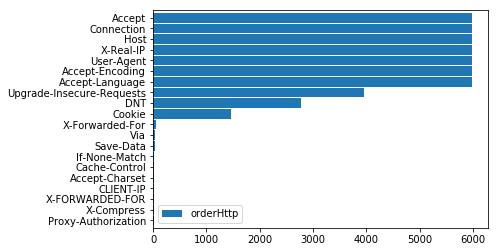

There are 10 unique terms for the attribute 'orderHttp'

The most used terms are: 
Accept        5986
Connection    5986
Host          5986
X-Real-IP     5986
User-Agent    5983
Name: orderHttp, dtype: int64

There are 42 orderHttp


In [128]:
analyse_terms_splited(df_consistent, 'orderHttp', split_order_http)

In [125]:
def analyze_grouped(df, attribute, group_by_attribute):
    tmp_stats = []
    ids = set(df['id'].unique())
    for user_id in ids:
        df_user_id = df[df_consistent['id'] == user_id]
        os_user = df_user_id["os"].values[0]
        browser_user = df_user_id["browserFamily"].values[0]

        different_values = df_user_id[attribute].unique()
        for value in different_values:
            tmp_stats.append({
                "id": user_id,
                "os": os_user,
                "browserFamily": browser_user,
                attribute: value
            })
  
    df_stats = pd.DataFrame(tmp_stats)
    stats_grouped = df_stats[group_by_attribute].value_counts()
   # print(stats_grouped.iteritems)
    grouped = df_stats.groupby([attribute])
    for name, group in grouped:
        norm = 0 
        count_per_group = group[group_by_attribute].value_counts()
        for key, number in stats_grouped.iteritems():
            try:
                norm += abs(number - count_per_group[key])
            except KeyError:
                norm += abs(number)

        if norm >= 0:
            print(name)
            print(count_per_group)

        print(norm)

In [126]:
analyze_grouped(df_consistent,'orderHttp', 'os')

Accept Accept-Charset Accept-Encoding Accept-Language Connection Cookie DNT Host Upgrade-Insecure-Requests User-Agent X-Real-IP
Windows 8.1    1
Name: os, dtype: int64
5985
Accept Accept-Charset Accept-Encoding Accept-Language Connection Cookie DNT Host User-Agent X-Real-IP
Windows 7    1
Name: os, dtype: int64
5985
Accept Accept-Charset Accept-Encoding Accept-Language Connection Cookie Host User-Agent X-Real-IP
Windows 8.1    2
Name: os, dtype: int64
5984
Accept Accept-Charset Accept-Encoding Accept-Language Connection DNT Host Upgrade-Insecure-Requests User-Agent X-Real-IP
Windows 8.1    1
Name: os, dtype: int64
5985
Accept Accept-Charset Accept-Encoding Accept-Language Connection DNT Host User-Agent X-Real-IP
Windows 8.1    4
Name: os, dtype: int64
5982
Accept Accept-Charset Accept-Encoding Accept-Language Connection Host Upgrade-Insecure-Requests User-Agent X-Real-IP
Windows 8.1    1
Windows 7      1
Name: os, dtype: int64
5984
Accept Accept-Charset Accept-Encoding Accept-Language 

In [130]:
def analyze_grouped_splited(df, attribute, group_by_attribute, split_function):
    tmp_dataset = []
    tmp_stats = []
    ids = set(df['id'].unique())
    for user_id in ids:
        df_user_id = df[df['id'] == user_id]
        os_user = df_user_id["os"].values[0]
        browser_user = df_user_id["browserFamily"].values[0]

        different_values = df_user_id[attribute].unique()
        for value in different_values:
            tmp_stats.append({
                "id": user_id,
                "os": os_user,
                "browserFamily": browser_user
            })
            values_split = split_function(value)

            for value_tmp in values_split:
                tmp_dataset.append({
                    "id": user_id,
                    "os": os_user,
                    "browserFamily": browser_user,
                    attribute: value_tmp

                })

    df_tmp = pd.DataFrame(tmp_dataset)
    df_stats = pd.DataFrame(tmp_stats)
    
    
    stats_grouped = df_stats.groupby(group_by_attribute).size()
    print(stats_grouped)
    
    stats_grouped = df_stats[group_by_attribute].value_counts()
    grouped = df_tmp.groupby([attribute])
    for name, group in grouped:
        norm = 0 
        count_per_group = group.groupby(group_by_attribute).size()
        #count_per_group = group[group_by_attribute].value_counts()
        for key, number in stats_grouped.iteritems():
            try:
                norm += (number - count_per_group[key])**2
            except KeyError:
                norm += number**2

        if norm >= 0:
            print(name)
            print(count_per_group)

        print(norm)

def split_headers(headers):
    return headers.split(" ")

def split_languages_http(languages):
    try:
        return languages.split(";")
    except AttributeError:
        return str(languages)
    
def split_accept_http(accept):
    return accept.split(",")

def split_plugins(attribute):
    return re.findall("Plugin [0-9]+: ([a-zA-Z -.]+)", str(attribute))

def split_order_http(order):
    return order.split(" ")

In [132]:
analyze_grouped_splited(df_consistent, 'orderHttp', 'browserFamily', split_order_http)

browserFamily
Chrome                         2515
Chromium                         85
Dragon                           12
Epiphany                          2
Firefox                        3207
IE Mobile                         1
Iceweasel                        34
Iron                             40
Konqueror                         1
Maxthon                           1
Opera                            16
Other                            11
Pale Moon (Firefox Variant)       2
QupZilla                          1
Rekonq                            1
SeaMonkey                         1
Vivaldi                          51
Yandex Browser                    5
dtype: int64
Accept
browserFamily
Chrome                         2515
Chromium                         85
Dragon                           12
Epiphany                          2
Firefox                        3207
IE Mobile                         1
Iceweasel                        34
Iron                             40
Konqueror       

In [105]:
analyze_grouped_splited(df_consistent, 'pluginsJS', ['os', 'browserFamily'], split_plugins)

  WeatherScope allows you to view interactive weather maps and graphs.
os        browserFamily
Mac OS X  Firefox          3
dtype: int64
12013289
 Wacom Dynamic Link Library
os           browserFamily
Windows 8.1  Firefox          1
dtype: int64
12014903
ABN AMRO e.dentifier
os          browserFamily
Windows 10  Firefox          9
dtype: int64
11992235
ABR
os          browserFamily
Windows 10  Firefox          2
dtype: int64
12010834
AOL Update
os          browserFamily
Windows 10  Chrome           1
Windows 7   Firefox          1
dtype: int64
12008812
ATT Connect Event Entry Plug-in 
os        browserFamily
Mac OS X  Firefox          3
dtype: int64
12013289
AVG SiteSafety plugin
os         browserFamily
Windows 7  Firefox          1
dtype: int64
12012309
Ace Stream P
os           browserFamily
Windows 10   Firefox          36
Windows 7    Firefox          29
Windows 8    Firefox           1
Windows 8.1  Firefox           5
             Iron              3
dtype: int64
11803942
ActiveT

Default Browser Helper
os        browserFamily
Mac OS X  Firefox          288
          Vivaldi            2
Other     Other              1
dtype: int64
11822005
DeployMe
os         browserFamily
Windows 7  Firefox          3
dtype: int64
12004601
Diag.Helper
os         browserFamily
Windows 7  Firefox          2
dtype: int64
12008454
DivX
os           browserFamily
Linux        Chrome             1
             Firefox           20
Ubuntu       Firefox          151
Windows 8.1  Firefox            8
dtype: int64
11915064
DivX Browser Plug-In
os      browserFamily
Linux   Firefox          4
Ubuntu  Firefox          8
dtype: int64
12008662
DivX Player Netscape Plugin
os          browserFamily
Windows 10  Firefox          1
dtype: int64
12013499
DivX Plus Web Player
os           browserFamily
Mac OS X     Firefox          42
Windows 10   Chrome            1
             Firefox           6
Windows 7    Firefox          10
Windows 8    Firefox           1
Windows 8.1  Firefox           3
d

Intel
os           browserFamily
Mac OS X     Firefox            2
Windows 10   Chrome            32
             Firefox          686
Windows 7    Chrome             6
             Firefox          366
Windows 8    Firefox           40
Windows 8.1  Firefox          264
Windows XP   Firefox            2
dtype: int64
8985982
InterBank RS Service Adapter
os         browserFamily
Windows 7  Firefox          1
dtype: int64
12012309
Java Applet Plug-in
os        browserFamily
Mac OS X  Chrome             1
          Firefox          321
          Vivaldi            2
Other     Other              3
dtype: int64
11808203
Java Deployment Toolkit 
os             browserFamily              
Other          Opera                            1
Windows 10     Chrome                          11
               Firefox                        584
               Opera                            7
Windows 7      Chrome                           4
               Firefox                        723
          

Orbitum Update
os         browserFamily
Windows 7  Firefox          1
dtype: int64
12012309
Outline
os           browserFamily
Windows 8.1  Firefox          1
dtype: int64
12014903
PDF Architect 
os           browserFamily
Windows 10   Firefox          27
Windows 7    Firefox          59
Windows 8.1  Firefox           2
Windows XP   Firefox          19
dtype: int64
11712019
PDF Browser Plugin 
os        browserFamily
Mac OS X  Firefox          28
dtype: int64
11990014
PDF-XChange Editor
os           browserFamily 
Windows 10   Firefox            1
Windows 7    Firefox           15
             Yandex Browser     1
Windows 8.1  Firefox            1
dtype: int64
11954582
PDF-XChange Viewer
os           browserFamily
Windows 10   Firefox          43
Windows 7    Firefox          10
Windows 8    Firefox           2
Windows 8.1  Firefox           9
Windows XP   Firefox           3
dtype: int64
11852301
PDFlite Browser Plugin
os          browserFamily
Windows 10  Firefox          2
Windows 7

SharePoint Browser Plug-in
os        browserFamily
Mac OS X  Chrome             1
          Firefox          214
dtype: int64
11853969
Shockwave Flash
os             browserFamily              
Chrome OS      Chrome                          116
FreeBSD        Firefox                           1
Linux          Chrome                          459
               Firefox                         137
               Iceweasel                         9
               Iron                              4
               Opera                             1
               QupZilla                          1
               Vivaldi                           7
Mac OS X       Chrome                          925
               Firefox                         424
               Iron                              1
               Vivaldi                           3
Other          Firefox                           1
               Other                             6
Ubuntu         Chromium                  

Windows Media Player Plug-in
os      browserFamily
Linux   Firefox          4
Ubuntu  Firefox          8
dtype: int64
12008662
Windows Media Player Plug-in 
os      browserFamily
Linux   Chrome             1
        Firefox           20
Ubuntu  Firefox          149
dtype: int64
11925868
Windows Media Player Plug-in Dynamic Link Library
os           browserFamily
Mac OS X     Opera              1
Other        Firefox            1
Windows 7    Firefox           11
Windows 8.1  Firefox            1
Windows XP   Firefox          144
dtype: int64
11943776
Windows Presentation Foundation
os             browserFamily
Windows 7      Firefox          22
Windows 8.1    Chrome            1
Windows Vista  Firefox          12
Windows XP     Firefox          76
dtype: int64
11910801
Wiz
os         browserFamily
Windows 7  Firefox          3
dtype: int64
12004601
Wolfram Mathematica
os          browserFamily
Mac OS X    Firefox           8
Windows 10  Firefox          18
Windows 7   Firefox          

In [39]:
#df_consistent['encodingHttp']
df_consistent['encodingHttp'].unique()

array(['gzip, deflate, sdch', 'gzip, deflate', nan, 'gzip, deflate, br',
       'gzip, deflate, lzma, sdch', 'gzip,deflate,sdch',
       'gzip,deflate,lzma,sdch', 'gzip, deflate, sdch, br',
       'gzip,deflate', 'gzip,deflate,identity',
       'gzip, deflate, lzma, sdch, br',
       'br, bzip2, compress, exi, gzip, lzma, pack200-gzip, peerdist, sdch, xpress, xz',
       'gzip, deflate, , br'], dtype=object)

In [21]:
analyse_terms_splited(df_consistent,'encodingHttp',split_function=lambda : encoding.split(","))

TypeError: <lambda>() takes 0 positional arguments but 1 was given

In [94]:
# analyze terms for the attribute 'encodingHttp'



encoding_http=df_stats['encodingHttp']
encoding_http_less_nan=encoding_http.dropna()

a = pd.DataFrame(encoding_http_less_nan)

def split_encoding_http(a):
    return a.str.split(",")


In [95]:
split_encoding_http(a['encodingHttp'])

0           [gzip, deflate, sdch]
1       [gzip, deflate, sdch, br]
2       [gzip, deflate, sdch, br]
3       [gzip, deflate, sdch, br]
4       [gzip, deflate, sdch, br]
5             [gzip, deflate, br]
6       [gzip, deflate, sdch, br]
7           [gzip, deflate, sdch]
8       [gzip, deflate, sdch, br]
9             [gzip, deflate, br]
10      [gzip, deflate, sdch, br]
11      [gzip, deflate, sdch, br]
12      [gzip, deflate, sdch, br]
13            [gzip, deflate, br]
14      [gzip, deflate, sdch, br]
15          [gzip, deflate, sdch]
16      [gzip, deflate, sdch, br]
17            [gzip, deflate, br]
18                [gzip, deflate]
19      [gzip, deflate, sdch, br]
20          [gzip, deflate, sdch]
21      [gzip, deflate, sdch, br]
22            [gzip, deflate, br]
23            [gzip, deflate, br]
24            [gzip, deflate, br]
25            [gzip, deflate, br]
26            [gzip, deflate, br]
27                [gzip, deflate]
28            [gzip, deflate, br]
29            

In [137]:
df_consistent['resolutionJS'].unique()

array(['1920x1200x24', '900x1440x24', '1600x1200x24', '768x1366x24',
       '1920x1080x24', '957x1914x24', '720x1280x24', '960x600x24',
       '900x1600x24', '768x1360x24', '800x1280x24', '2880x1800x24',
       '936x1664x24', '2560x1440x24', '713x1333x24', '0x0x24',
       '1280x1024x24', '768x1280x24', '800x600x24', '864x1536x24',
       '1920x1097x24', '1680x1050x24', '614x1093x24', '663x1360x24',
       '768x1368x24', '1672x1080x24', '600x1067x24', '1985x1246x24',
       '768x1364x24', '1876x1098x16', '768x1024x24', '880x1408x24',
       '640x480x24', '770x1368x24', '983x1920x24', '3200x1800x24',
       '960x1536x24', '600x1066x24', '2560x1600x24', '828x1592x24',
       '819x1024x24', '960x1280x24', '963x1280x24', '2048x1152x24',
       '819x614x24', '2133x1200x24', '920x1280x24', '1280x1024x32',
       '5760x1080x24', '912x1368x24', '840x1344x24', '1600x1000x24',
       '864x1152x24', '2560x1080x24', '1828x1028x24', '1829x1029x24',
       '1280x1024x16', '2194x1234x24', '916x1280x2